<img src="logo.png">

<img src="logo2.png">

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
dataset = load_iris()

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
dataset['target_names']  #array

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

* sling : [s:e]
* df.loc[s:e]
* df.iloc[s:e]
* array list str [s:e]   

In [5]:
dataset['target'][0:10]   #array  0~9
dataset['target'][50:60]  #array  50~59
dataset['target'][-10:]   #array  끝에서10
np.unique(dataset['target'],return_counts=True)
# dataset['target']
# numpy.unique(ar, return_index=False, return_inverse=False, return_counts=False, axis=None)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [6]:
dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
dataset['data'][:5]  #array

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
col_names = ['sepal_length','sepal_width','petal_length','petal_width']
df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
# pd.DataFrame(data=dataset['data'], columns=col_names)

In [9]:
col_names = ['sepal_length','sepal_width','petal_length','petal_width']
df.columns = col_names
# df.index.values[:5]
# df.rename(columns = {'sepal_length' : 'ㅁㅁㅁㅁ'}, inplace = True)

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
# DataFrame + Series : concat(axis=1)

In [12]:
s = pd.Series(dataset['target'])
df = pd.concat([df, s], axis=1)

In [13]:
# df.rename(columns = {0:"target2"}, inplace=True)
df = df.rename(columns = {0:"target2"})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target2
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
#DataFrame +  target array

In [15]:
df['target'] = dataset['target']

In [16]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target2,target
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


#### DataFrame에서 target2 피쳐 삭제

In [17]:
# df.drop("target2", axis=1, inplace=True)
df = df.drop("target2", axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
df222 = df.copy()
df222.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
df222 = df222.drop(index=1)

In [20]:
df222.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


## 결측 , 수치형

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


## 가공

## 학습
* 1) 문제지 정답지 분리 == target 분리시키기
* 2) 8:2 train test 나누기
* 3) model 선정
* 4) model.fit(문제지8,답안지8) 
* 5) 컴답2 = model.predict(문제지2) 
* 6) accuracy_score(답안지2 ,컴답2)

In [22]:
y = df['target']

In [23]:
# 문제지  = df[['sepal_length','sepal_width','petal_length','petal_width']]
X = df.drop(['target'], axis=1)

In [24]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=555,shuffle=True)

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

C:\AI\pythonProject\venv\Scripts;C:\oraclexe\app\oracle\product\11.2.0\server\bin;C:\ProgramData\Oracle\Java\javapath;C:\Program Files (x86)\Intel\Intel(R) Management Engine Components\iCLS\;C:\Program Files\Intel\Intel(R) Management Engine Components\iCLS\;C:\windows\system32;C:\windows;C:\windows\System32\Wbem;C:\windows\System32\WindowsPowerShell\v1.0\;C:\windows\System32\OpenSSH\;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Program Files\Intel\WiFi\bin\;C:\Program Files\Common Files\Intel\WirelessCommon\;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0\;C:\WINDOWS\System32\OpenSSH\;C:\Program Files (x86)\Intel\Intel(R) Management Engine Components\DAL;C:\Program Files\Intel\Intel(R) Management Engine Components\DAL;C:\AI\Graphviz\bin;C:\AI\Python38\Scripts\;C:\AI\Python38\;C:\Users\674\anaconda3;C:\Users\674\anaconda3\Library\mingw-w64\bin;C:\Users\674\anaconda3\Library\usr\bin;C:\Users\674\anaconda3\Library\bin;C:\User

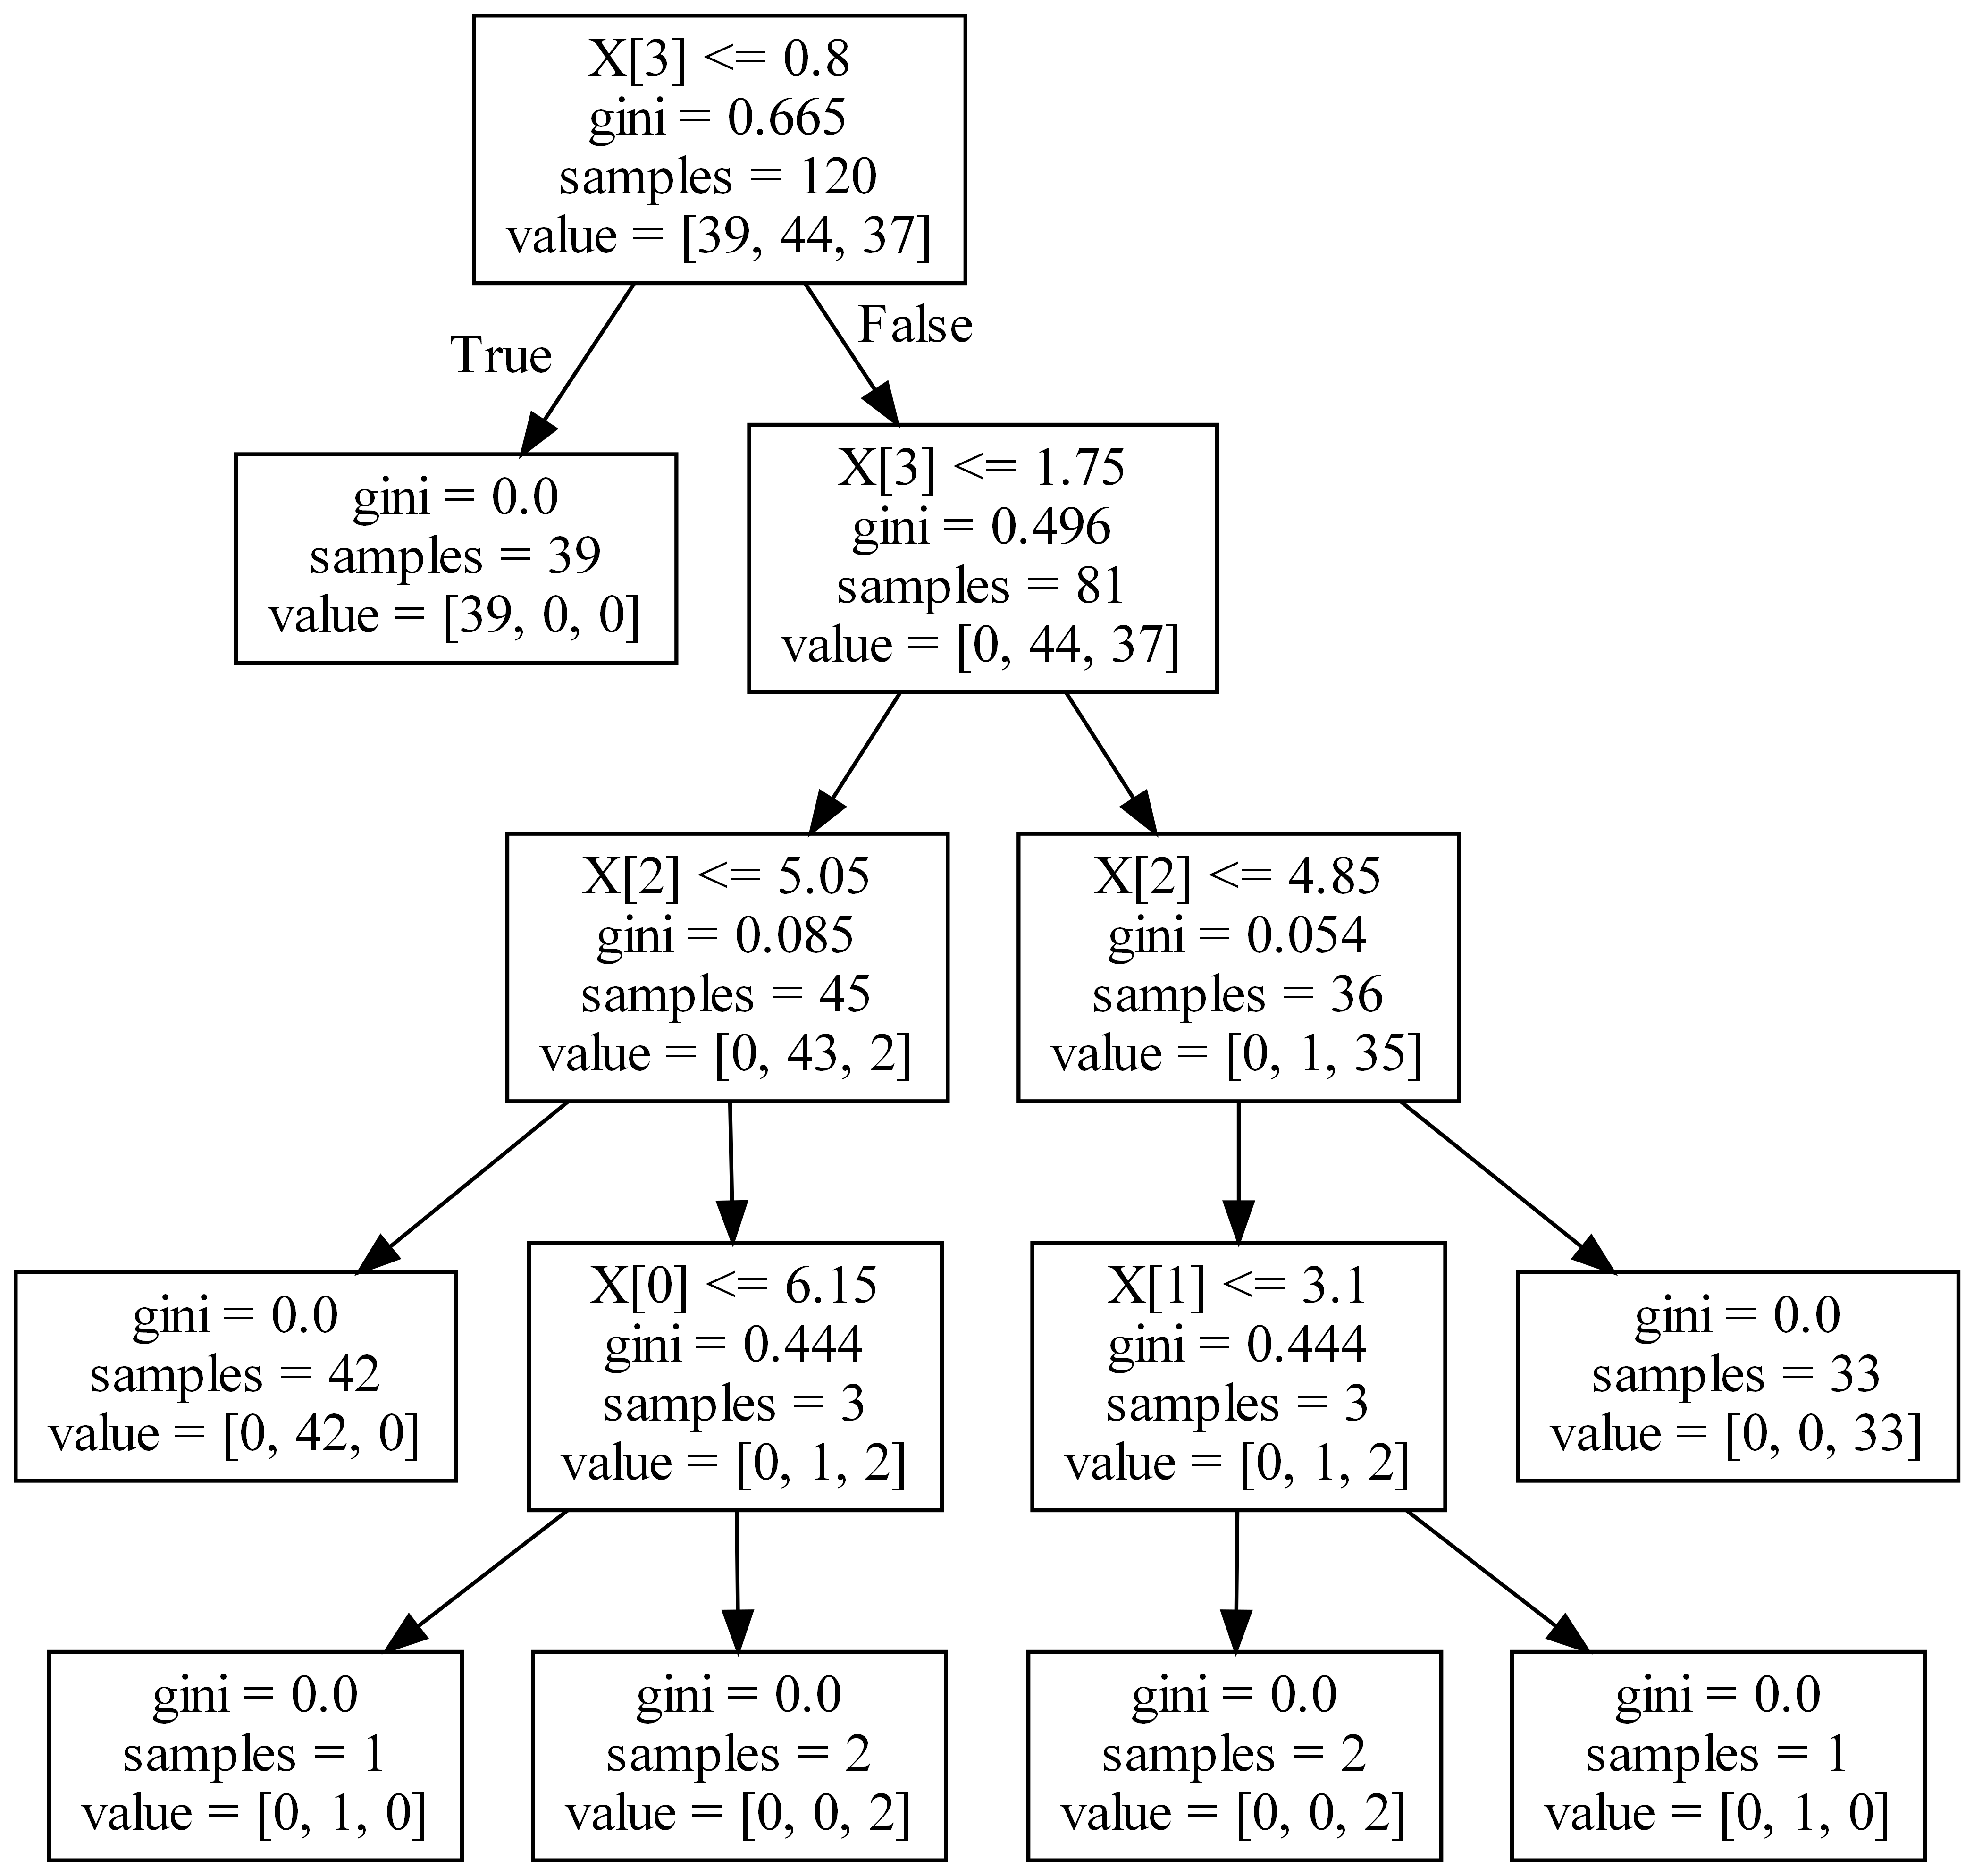

In [28]:
# Graphviz 설치하기

# all user / c: / AI / graphicviz

# 1. https://graphviz.org/download/ 접속하여 msi 파일 다운로드
# 2. 시스템 환경변수 path 추가
#  - 파일위치\graphviz2.xx\bin
#  - 파일위치\graphviz2.xx\bin\dot.exe
# 3. 파이썬

import os
os.environ["PATH"] += os.pathsep + 'C:\\AI\\Graphviz\\bin'
print(os.environ["PATH"])


from sklearn.tree import export_graphviz
# .dot 파일로 export 해줍니다
export_graphviz(model, out_file='tree.dot')

# 생성된 .dot 파일을 .png로 변환
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # jupyter notebook에서 .png 직접 출력
from IPython.display import Image
Image(filename = 'tree.png')


# C:\AI\Graphviz\bin
# C:\AI\Graphviz\bin\dot.exe